12_neda_mimfpt_(ML_SVR)

Engin Abdan

### Libraries

In [195]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.svm import SVR, LinearSVR

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('classic')
sns.set_style("white")

### Data

In [196]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [197]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [198]:
drop_list = ["Unnamed: 0", "Plt_Or_Not","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Flight_Mean
0,20,19,10,16,13,16,17,22,95


### Data infos

In [199]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.000,17.720,3.069,11.000,16.000,17.000,20.000,26.000
Math_Int,100.000,17.750,3.655,10.000,15.000,17.000,19.000,33.000
Spa_Int,100.000,17.810,3.047,10.000,15.750,17.500,20.000,26.000
Mus_Int,100.000,17.860,3.111,10.000,16.000,17.500,20.000,26.000
Nat_Int,100.000,18.160,3.741,10.000,15.750,18.000,20.000,33.000
Body_Int,100.000,17.200,2.670,10.000,15.000,17.000,19.000,23.000
Interp_Int,100.000,17.780,2.866,12.000,16.000,18.000,19.000,26.000
Intrap_Int,100.000,18.070,2.875,13.000,16.000,18.000,20.000,26.000
Flight_Mean,100.000,75.000,12.092,55.000,63.750,75.000,86.000,98.000


### Skewness

In [200]:
x = stu.drop(columns=["Flight_Mean"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [201]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [202]:
#sns.pairplot(stu,hue="Flight_Mean");

### Corr With Plt_Or_Not

<AxesSubplot:>

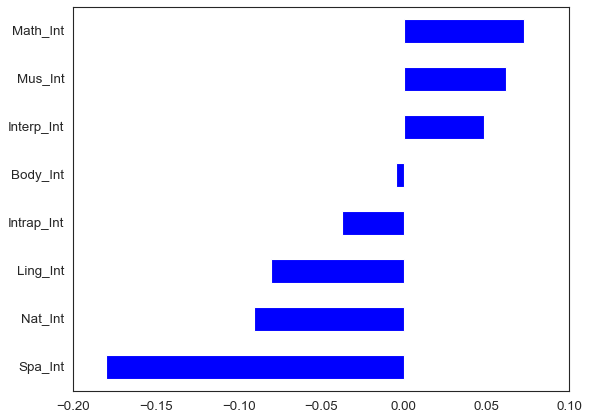

In [203]:
stu.corr()["Flight_Mean"].drop("Flight_Mean").sort_values().plot.barh()

### Train Test Split

In [204]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Flight_Mean"], axis=1)
y = stu["Flight_Mean"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### Scaling

In [205]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### SVR Model

In [206]:
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### SVR & Without Scalling

In [207]:
model = SVR()

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: -0.11222600394217519
rmse	: 12.3123989754494


### SVR & With Scalling

In [208]:
model = SVR()

model.fit(x_train_scaled, y_train)
y_test_pred = model.predict(x_test_scaled)

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: -0.11943521188085704
rmse	: 12.352237674302527


### SVR & CV

In [209]:
model = SVR()

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring=['r2', 'neg_root_mean_squared_error'],
                        cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores[["r2", "rmse"]] = df_scores[["test_r2", "test_neg_root_mean_squared_error"]]
df_scores[["r2", "rmse"]]

test_r2                             -0.279
test_neg_root_mean_squared_error   -12.733
dtype: float64
----------------------------------------------------------------


,r2,rmse
0,-0.555,-13.126
1,-0.016,-11.343
2,-0.177,-13.600
3,-0.170,-13.380
4,-0.477,-12.218


### With Best Parameters (GridsearchCV)

In [210]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

model = SVR()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

model_grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.412 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.412 total time=   0.0s
[CV 1/5] END .C=0.0001, gamma=auto, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=au

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [211]:
model_grid.best_params_

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

In [212]:
model_grid.best_estimator_

SVR(C=0.0001, gamma=0.0001)

In [213]:
y_test_pred = model_grid.predict(x_test)

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: -0.10225885030050352
rmse	: 12.257106369935064


### Prediction

In [214]:
final_model = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
final_model.fit(x, y)

SVR(C=0.0001, gamma=0.0001)

In [215]:
columns_name = x.columns

In [216]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [217]:
predictions = final_model.predict(pred_data)[0].astype("int")
predictions

75

In [218]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = predictions

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 75
Result		: Pilot
